# Machine Learning

## Predições

### Naive Bayes

#### Conhecer o dataframe

In [1]:
import pandas as pd

credito = pd.read_csv('Machine Learning/Dados/Credit.csv')
display(credito.dtypes)

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

#### Alimentar as variáveis de previsão

In [2]:
previsores = credito.iloc[:, :-1].values
classe = credito.iloc[:, len(credito.columns) - 1].values

#### Substituir os atributos categóricos

In [3]:
from sklearn.preprocessing import LabelEncoder

for i, column in enumerate(credito.columns):
    if credito[column].dtype == object and i < len(credito.columns) - 1:
        previsores[:, i] = LabelEncoder().fit_transform(previsores[:, i])

#### Declarar variáveis para o modelo

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

#### Criar e treinar modelo

In [5]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Gerar predições com os dados de teste

In [6]:
previsoes = naive_bayes.predict(X_test)

#### Gerar matriz de confusão com sklearn

71.0% de acertos.


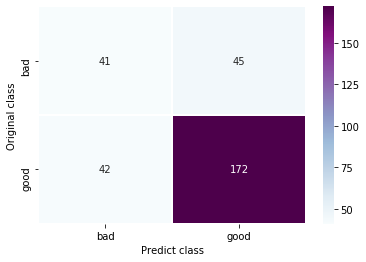

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

confusao = confusion_matrix(y_test, previsoes)
tx_acerto = accuracy_score(y_test, previsoes)
distinct = np.unique(y_test)

print('%.1f%% de acertos.' % (tx_acerto * 100))

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_cm = pd.DataFrame(confusao, index = distinct, columns = distinct)

ax = sns.heatmap(df_cm, annot = True, linewidths = 0.5, cmap = 'BuPu', fmt = 'g')
ax.set(xlabel='Predict class', ylabel='Original class')
# plt.figure(figsize = (10,7)) # Definir tamanho da figura
plt.show()

#### Gerar matriz de confusão com yellowbrick

71.0% de acertos.


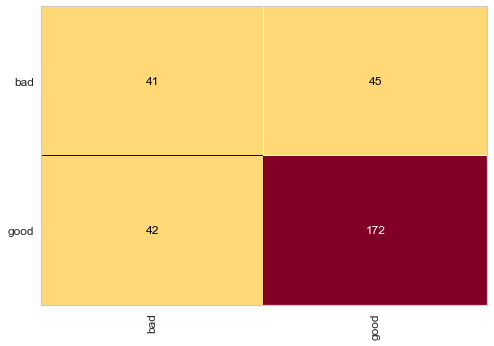

In [8]:
from yellowbrick.classifier import ConfusionMatrix

v = ConfusionMatrix(GaussianNB())
v.fit(X_train, y_train)

print('%.1f%% de acertos.' % (v.score(X_test, y_test) * 100))
v.poof
plt.show()

#### Importar a base para simulação em produção

In [9]:
novo_credito = pd.read_csv('Machine Learning/Dados/NovoCredit.csv')

#### Alimentar variável para previsão

In [10]:
X_newcredit = novo_credito.iloc[:, :].values

#### Substituir os atributos categóricos

In [11]:
for i, column in enumerate(novo_credito.columns):
    if novo_credito[column].dtype == object:
        X_newcredit[:, i] = LabelEncoder().fit_transform(X_newcredit[:, i])

#### Gerar predição

In [12]:
display(naive_bayes.predict(X_newcredit))

array(['good'], dtype='<U4')

### Árvore de decisões

#### Treinar a árvore de decisões

In [13]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Instalar pacote para visualizar a árvore

In [14]:
! pip install graphviz
# Install on Terminal > conda install graphviz

#### Exibir a árvore de decisão

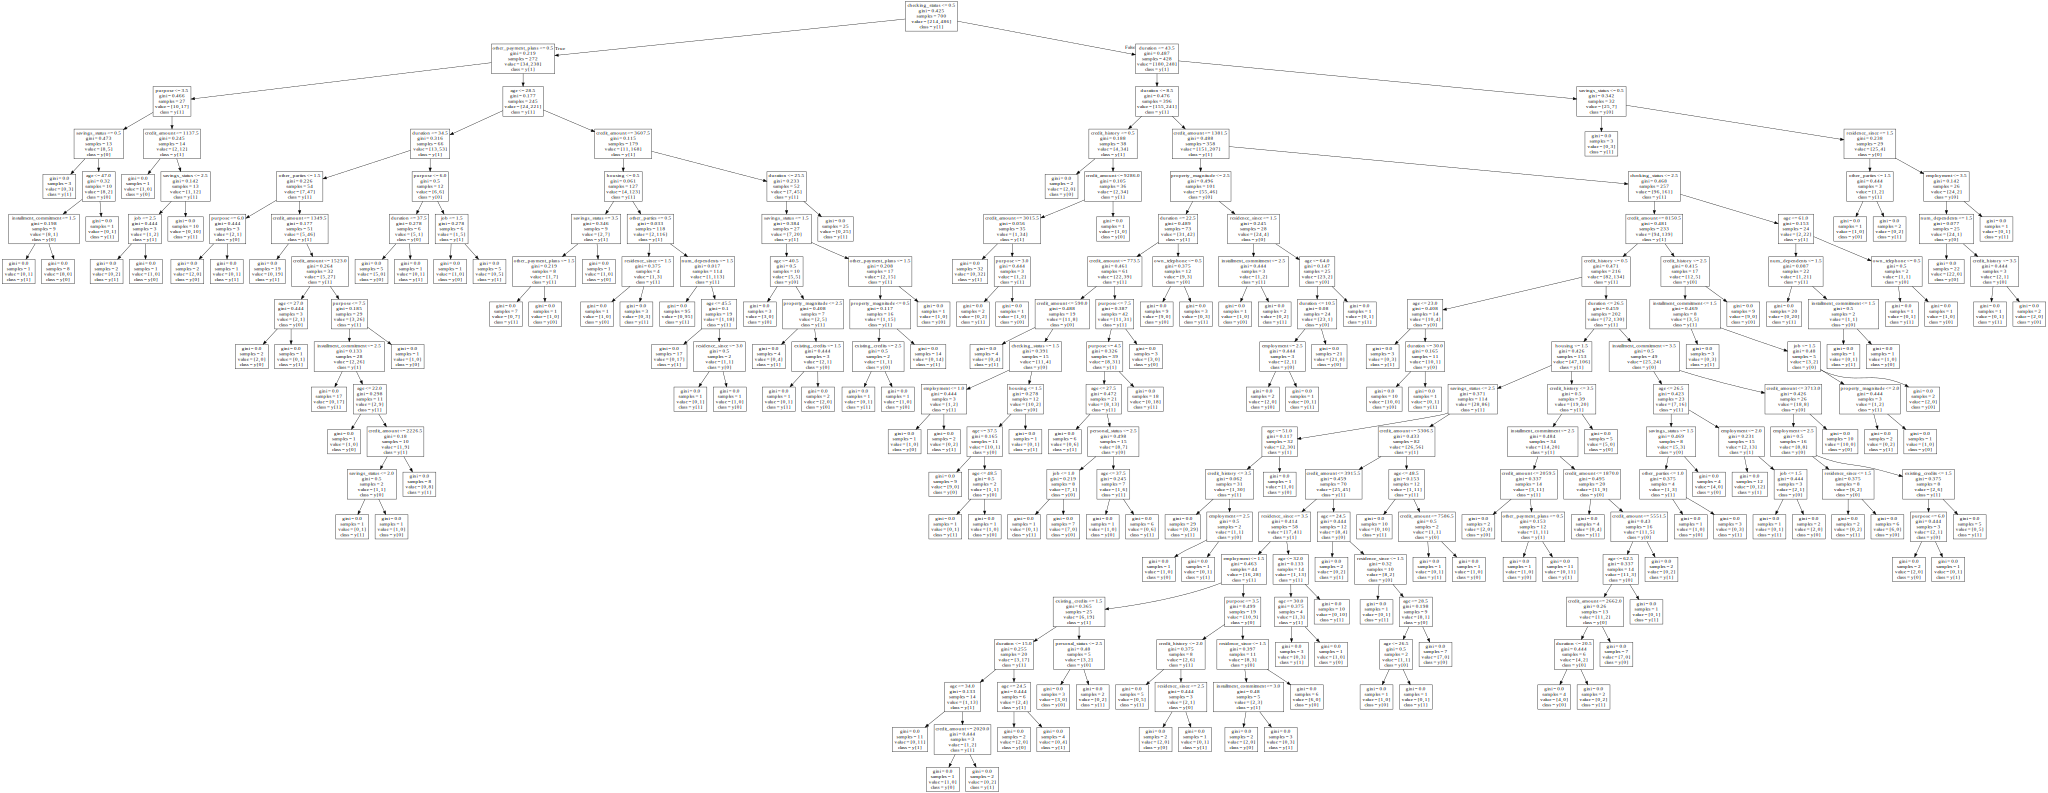

In [15]:
import graphviz
from sklearn import tree

columns = list(credito.columns[:-1])
dot_data = tree.export_graphviz(decisiontree,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
# graph.render("image",view=True) # Abrir .pdf
display(graph)

#### Gerar predições

68.0% de acertos.


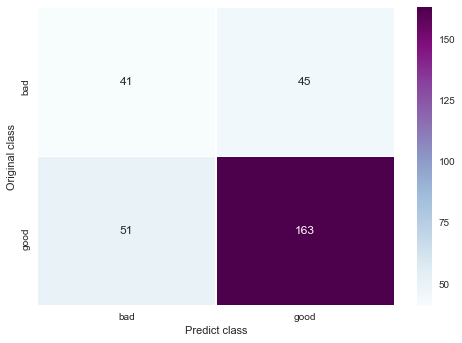

In [16]:
previsoes = decisiontree.predict(X_test)

confusao = confusion_matrix(y_test, previsoes)
tx_acerto = accuracy_score(y_test, previsoes)
distinct = np.unique(y_test)

print('%.1f%% de acertos.' % (tx_acerto * 100))

df_cm = pd.DataFrame(confusao, index = distinct, columns = distinct)

ax = sns.heatmap(df_cm, annot = True, linewidths = 0.5, cmap = 'BuPu', fmt='g')
ax.set(xlabel='Predict class', ylabel='Original class')
plt.show()

### Seleção de atributos (SVM)

#### Treinar modelo

In [17]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Gerar predições

71.3% de acertos.


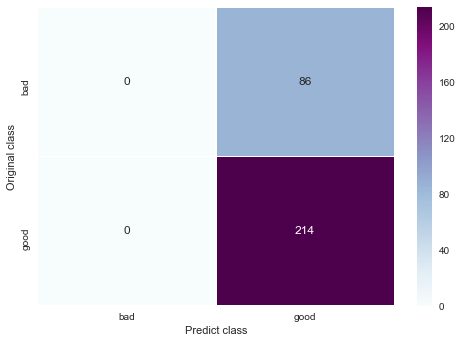

In [18]:
previsoes = svm.predict(X_test)

confusao = confusion_matrix(y_test, previsoes)
tx_acerto = accuracy_score(y_test, previsoes)
distinct = np.unique(y_test)

print('%.1f%% de acertos.' % (tx_acerto * 100))

df_cm = pd.DataFrame(confusao, index = distinct, columns = distinct)

ax = sns.heatmap(df_cm, annot = True, linewidths = 0.5, cmap = 'BuPu', fmt='g')
ax.set(xlabel='Predict class', ylabel='Original class')
plt.show()

#### Gerar importância de cada atributo no modelo

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier()
forest.fit(X_train, y_train)

importancias = forest.feature_importances_

importancias = pd.DataFrame(zip(credito.columns[:-1], importancias), columns=['Atributo', 'Importancia']).sort_values(ascending=False, by='Importancia')
display(importancias)

/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Atributo,Importancia
0,checking_status,0.102297
1,duration,0.088512
4,credit_amount,0.082443
2,credit_history,0.067865
12,age,0.066406
3,purpose,0.062386
8,personal_status,0.048904
16,job,0.048730
6,employment,0.048440
11,property_magnitude,0.047066


#### Selecionar os atributos mais relevantes

In [20]:
X_train2 = X_train[:, importancias.Atributo[0:2].index]
X_test2 = X_test[:, importancias.Atributo[0:2].index]

#### Treinar modelo com atributos relevantes

In [21]:
svm2 = SVC()
svm2.fit(X_train2, y_train)

/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Gerar predições com o novo modelo

72.3% de acertos.


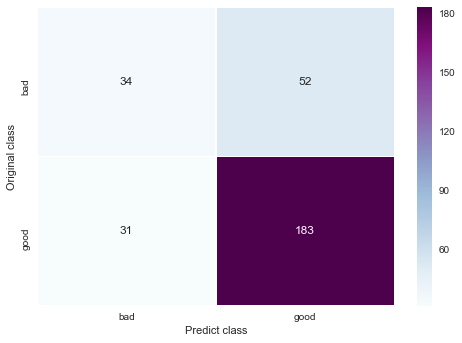

In [22]:
previsoes = svm2.predict(X_test2)

confusao = confusion_matrix(y_test, previsoes)
tx_acerto = accuracy_score(y_test, previsoes)
distinct = np.unique(y_test)

print('%.1f%% de acertos.' % (tx_acerto * 100))

df_cm = pd.DataFrame(confusao, index = distinct, columns = distinct)

ax = sns.heatmap(df_cm, annot = True, linewidths = 0.5, cmap = 'BuPu', fmt='g')
ax.set(xlabel='Predict class', ylabel='Original class')
plt.show()

### Aprendizado baseado em instâncias (KNM)

#### Conhecer o dataframe

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from scipy import stats

iris = datasets.load_iris()

display(stats.describe(iris.data))

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

#### Alimentar variáveis de predição

In [24]:
previsores_iris = iris.data
classe_iris = iris.target

#### Declarar variáveis para o modelo

In [25]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(previsores_iris, classe_iris, test_size = 0.3, random_state = 0)

#### Treinar modelo

In [26]:
knm = KNeighborsClassifier(n_neighbors = 3)
knm.fit(X_train_iris, y_train_iris)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

####  Gerar predições

97.8% de acertos.


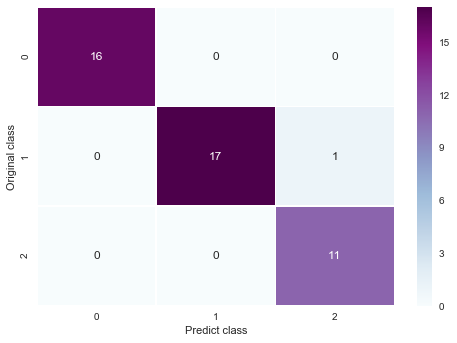

In [27]:
previsoes = knm.predict(X_test_iris)

confusao = confusion_matrix(y_test_iris, previsoes)
tx_acerto = accuracy_score(y_test_iris, previsoes)
distinct = np.unique(y_test_iris)

print('%.1f%% de acertos.' % (tx_acerto * 100))

df_cm = pd.DataFrame(confusao, index = distinct, columns = distinct)

ax = sns.heatmap(df_cm, annot = True, linewidths = 0.5, cmap = 'BuPu', fmt='g')
ax.set(xlabel='Predict class', ylabel='Original class')
plt.show()

### Ensemble Learning

#### Treinar modelo

In [28]:
from sklearn.ensemble import RandomForestClassifier

florest = RandomForestClassifier(n_estimators = 100)
florest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Gerar predições

78.3% de acertos.


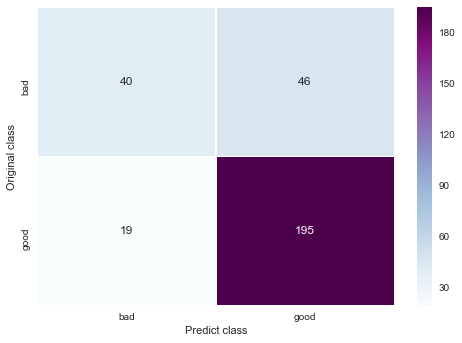

In [29]:
previsoes = florest.predict(X_test)

confusao = confusion_matrix(y_test, previsoes)
tx_acerto = accuracy_score(y_test, previsoes)
distinct = np.unique(y_test)

print('%.1f%% de acertos.' % (tx_acerto * 100))

df_cm = pd.DataFrame(confusao, index = distinct, columns = distinct)

ax = sns.heatmap(df_cm, annot = True, linewidths = 0.5, cmap = 'BuPu', fmt='g')
ax.set(xlabel='Predict class', ylabel='Original class')
plt.show()

#### Exibir árvores de decisão utilizadas

In [30]:
display(florest.estimators_)

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1331923199, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=194390705, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

## Classificação

### K-means

#### Estudar a base de dados

In [31]:
unicos, qtd = np.unique(iris.target, return_counts = True)

display(unicos, qtd)

array([0, 1, 2])

array([50, 50, 50])

#### Criar modelo

In [32]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters = 3)
cluster.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Classificar

In [33]:
centroides = cluster.cluster_centers_
previsoes = cluster.labels_

display(centroides, previsoes)

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

#### Estudar os resultados

In [34]:
unicos2, qtd2 = np.unique(previsoes, return_counts = True)

display(unicos2, qtd2)

array([0, 1, 2], dtype=int32)

array([62, 50, 38])

#### Gerar matriz de confusão

In [35]:
""" Gerar matriz com maior porcentagem de acertos indicando a classe predita sem repetir esta,
priorizando as porcentagens de match mais altas """

' Gerar matriz com maior porcentagem de acertos indicando a classe predita sem repetir esta,\npriorizando as porcentagens de match mais altas '

24.0% de acertos.


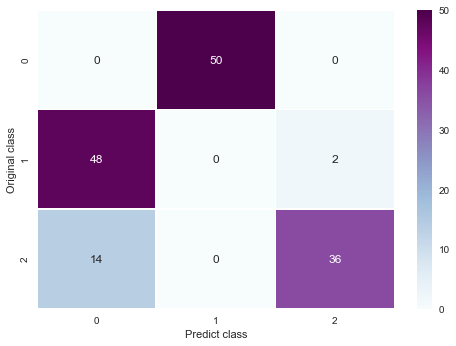

In [36]:
confusao = confusion_matrix(iris.target, previsoes)
tx_acerto = accuracy_score(iris.target, previsoes)

print('%.1f%% de acertos.' % (tx_acerto * 100))

df_cm = pd.DataFrame(confusao, index = unicos, columns = unicos)

ax = sns.heatmap(df_cm, annot = True, linewidths = 0.5, cmap = 'BuPu', fmt='g')
ax.set(xlabel='Predict class', ylabel='Original class')
plt.show()

### Fuzzy c-means

#### Instalar pacote

In [37]:
! pip install scikit-fuzzy

#### Gerar resultados

In [38]:
import skfuzzy

r = skfuzzy.cmeans(data = iris.data.T, # data = precisa transpor
                   c = 3, # c = clusters
                   m = 2, # m = membership 2, = default
                   error = 0.005, # critério de parada, 0.005 = default
                   maxiter = 1000, # max_iter = vezes que o modelo fará a repetição
                   init = None)

#### Gerar probabilidade dos registros para cada grupo

In [39]:
previsoes_porcentagens = r[1].T

display(previsoes_porcentagens)

array([[9.96623631e-01, 2.30443802e-03, 1.07193055e-03],
       [9.75839558e-01, 1.66592516e-02, 7.50118990e-03],
       [9.79817464e-01, 1.37658624e-02, 6.41667383e-03],
       [9.67410246e-01, 2.24779687e-02, 1.01117849e-02],
       [9.94470047e-01, 3.76206009e-03, 1.76789331e-03],
       [9.34546337e-01, 4.48265794e-02, 2.06270833e-02],
       [9.79482880e-01, 1.40103994e-02, 6.50672074e-03],
       [9.99547027e-01, 3.11708345e-04, 1.41265133e-04],
       [9.30347034e-01, 4.77425028e-02, 2.19104632e-02],
       [9.82713163e-01, 1.19428156e-02, 5.34402133e-03],
       [9.68030200e-01, 2.17657129e-02, 1.02040876e-02],
       [9.92132300e-01, 5.43538459e-03, 2.43231525e-03],
       [9.70625425e-01, 2.01937530e-02, 9.18082192e-03],
       [9.22940151e-01, 5.18162471e-02, 2.52436022e-02],
       [8.89726929e-01, 7.26317947e-02, 3.76412764e-02],
       [8.41299780e-01, 1.04379869e-01, 5.43203508e-02],
       [9.46908153e-01, 3.55915247e-02, 1.75003224e-02],
       [9.96652338e-01, 2.28883

#### Classificar

89.3% de acertos.


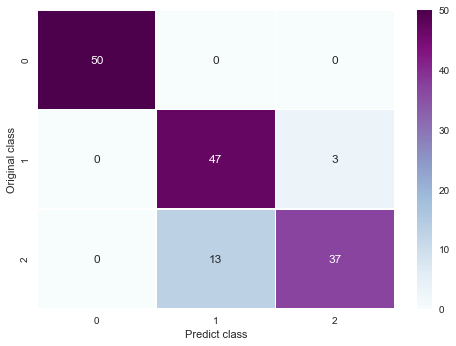

In [40]:
previsoes = previsoes_porcentagens.argmax(axis = 1) # axis = 0 para colunas

confusao = confusion_matrix(iris.target, previsoes)
tx_acerto = accuracy_score(iris.target, previsoes)
distinct = np.unique(iris.target)

print('%.1f%% de acertos.' % (tx_acerto * 100))

df_cm = pd.DataFrame(confusao, index = distinct, columns = distinct)

ax = sns.heatmap(df_cm, annot = True, linewidths = 0.5, cmap = 'BuPu', fmt='g')
ax.set(xlabel='Predict class', ylabel='Original class')
plt.show()

### K-medoids

#### Instalar pacote

In [41]:
! pip install pyclustering

#### Processar modelo

In [42]:
from pyclustering.cluster.kmedoids import kmedoids

cluster = kmedoids(iris.data[:, 0:2], [3, 12, 20])
cluster.get_medoids()
cluster.process()

#### Classificar

In [43]:
previsoes = cluster.get_clusters() # Gera o index do registro dentro da lista da classe
print(previsoes)

[[7, 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 106], [67, 53, 55, 57, 59, 60, 61, 62, 63, 64, 66, 68, 69, 70, 71, 72, 73, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 113, 114, 119, 121, 123, 126, 127, 133, 134, 138, 142, 146, 149], [112, 50, 51, 52, 54, 56, 58, 65, 74, 75, 76, 77, 86, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148]]


#### Gerar medoides

In [44]:
medoides = cluster.get_medoids()
display(medoides)

[7, 67, 112]

#### Visualizar clusters gerados

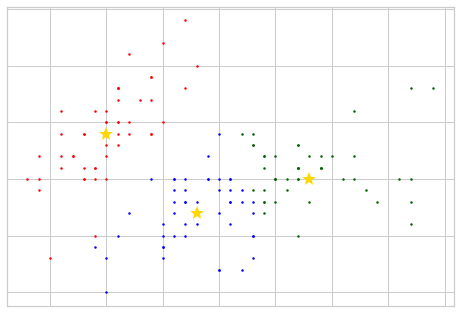

In [45]:
from pyclustering.cluster import cluster_visualizer

v = cluster_visualizer()
v.append_clusters(previsoes, iris.data[:, 0:2])
v.append_cluster(medoides, data = iris.data[:, 0:2], marker = '*', markersize = 15)
v.show()
plt.show()

#### Reorganizar as classificações em uma lista única

In [46]:
previsoes_r = []
index_list = []

for i, index in enumerate(previsoes):
    for j in index:
        previsoes_r.append(i)
        index_list.append(j)

previsoes_r = pd.DataFrame(previsoes_r, index = index_list).sort_index().values

#### Gerar matriz de confusão

82.0% de acertos.


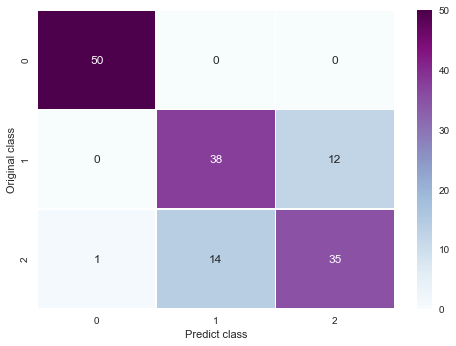

In [47]:
confusao = confusion_matrix(iris.target, previsoes_r)
tx_acerto = accuracy_score(iris.target, previsoes_r)
distinct = np.unique(iris.target)

print('%.1f%% de acertos.' % (tx_acerto * 100))

df_cm = pd.DataFrame(confusao, index = distinct, columns = distinct)

ax = sns.heatmap(df_cm, annot = True, linewidths = 0.5, cmap = 'BuPu', fmt='g')
ax.set(xlabel='Predict class', ylabel='Original class')
plt.show()

## Associação

### Apriori

#### Importar dataframe

In [48]:
dados = pd.read_csv('Machine Learning/Dados/transacoes.txt', header = None)
transacoes = []

for i in range(len(dados)):
    transacoes.append([str(dados.values[i, j]) for j in range(len(dados.columns))])

display(transacoes)

[['Cerveja', 'Pizza', 'Sorvete'],
 ['Pizza', 'Sorvete', 'nan'],
 ['Cerveja', 'Pizza', 'nan'],
 ['Cerveja', 'Pizza', 'Sorvete'],
 ['Cerveja', 'Pizza', 'nan'],
 ['Pizza', 'nan', 'nan']]

#### Instalar pacote

In [49]:
! pip install apyori

#### Gerar regras

In [50]:
from apyori import apriori

regras = apriori(transacoes, min_support = 0.5, min_confidence = 0.5)
resultados = list(regras)
display(resultados)

[RelationRecord(items=frozenset({'Cerveja'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cerveja'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'Pizza'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pizza'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Sorvete'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Sorvete'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'nan'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'Cerveja', 'Pizza'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Cerveja'}), items_add=frozenset({'Pizza'}), confidence=1.0, lift=1.0), Ordere

#### Visualizar regras

In [51]:
vresultados = [list(x) for x in resultados]

display(vresultados)

[[frozenset({'Cerveja'}),
  0.6666666666666666,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cerveja'}), confidence=0.6666666666666666, lift=1.0)]],
 [frozenset({'Pizza'}),
  1.0,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Pizza'}), confidence=1.0, lift=1.0)]],
 [frozenset({'Sorvete'}),
  0.5,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Sorvete'}), confidence=0.5, lift=1.0)]],
 [frozenset({'nan'}),
  0.6666666666666666,
  [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.6666666666666666, lift=1.0)]],
 [frozenset({'Cerveja', 'Pizza'}),
  0.6666666666666666,
  [OrderedStatistic(items_base=frozenset({'Cerveja'}), items_add=frozenset({'Pizza'}), confidence=1.0, lift=1.0),
   OrderedStatistic(items_base=frozenset({'Pizza'}), items_add=frozenset({'Cerveja'}), confidence=0.6666666666666666, lift=1.0)]],
 [frozenset({'Pizza', 'Sorvete'}),
  0.5,
  [OrderedStatistic(items_base=frozenset({'Pizza